# Plots and Data Summaries

Haziq Jamil

## Load data

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: sf
Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

here() starts at /Users/haziqj/github_local/house-data

Rows: 31116 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): quarter, kampong, mukim, district, type, tenure, status, agent, s...
dbl   (7): id, price, plot_area, floor_area, storeys, beds, baths
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 39 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): quarter
dbl (1): rppi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Summary of variables

In [ ]:
hsp |>
  mutate(
    price = price / 1000,
    storeys = factor(
      ifelse(storeys >= 3, "3+", as.character(storeys)),
      levels = c("1", "2", "3+")
    ),
    district = gsub("Brunei Muara", "Brunei-Muara", district),
    district = factor(district, levels = c("Brunei-Muara", "Belait", "Tutong", "Temburong"))
  ) |>
  tbl_summary(
    include = c(price:baths),
    by = district,
    missing = "no", 
    type = all_continuous() ~ "continuous2",
    statistic = list(
      all_continuous2() ~ c("{mean} ({sd})", Range = "{min} - {max}", "{median} ({p25}, {p75})")
    ),
    label = list(
      price = "Price (BND 1,000)",
      type = "Property type",
      plot_area = "Plot area (acres)",
      floor_area = "Floor area (sq. ft.)",
      storeys = "Number of storeys",
      status = "Development status",
      tenure = "Land tenure",    
      beds = "Number of bedrooms",
      baths = "Number of bathrooms"
    ),
    digits = list(
      baths = 1,
      beds = 1
    )
  ) |>
  add_overall() |>
  add_n() |>
  modify_header(label ~ "**Variable**") |>
  as_gt()


Variable,N,"Overall N = 31,1161","Brunei-Muara N = 28,5701","Belait N = 1,4841",Tutong N = 7671,Temburong N = 2951
"Price (BND 1,000)","31,116",,,,,
Mean (SD),,340 (381),340 (393),372 (208),259 (87),421 (324)
Min - Max,,"70 - 13,800","70 - 13,800","98 - 2,800",116 - 680,"118 - 1,800"
"Median (Q1, Q3)",,"288 (230, 380)","285 (230, 380)","320 (268, 400)","245 (198, 310)","390 (250, 430)"
Property type,"27,231",,,,,
Detached,,"17,416 (64%)","16,307 (65%)",520 (42%),509 (74%),80 (56%)
Semi-Detached,,"3,823 (14%)","3,591 (14%)",97 (7.8%),128 (19%),7 (4.9%)
Terrace,,"4,449 (16%)","4,134 (16%)",213 (17%),48 (7.0%),54 (38%)
Apartment,,"1,527 (5.6%)","1,106 (4.4%)",414 (33%),4 (0.6%),3 (2.1%)
Land,,16 (<0.1%),11 (<0.1%),4 (0.3%),1 (0.1%),0 (0%)


## Correlations

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 16641 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 10136 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 15292 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14313 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 16516 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11496 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 7748 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14451 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 4485 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11422 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 7748 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 14451 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 4485 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11422 rows containing missing values

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_density()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

(`stat_smooth()`).

(`geom_point()`).

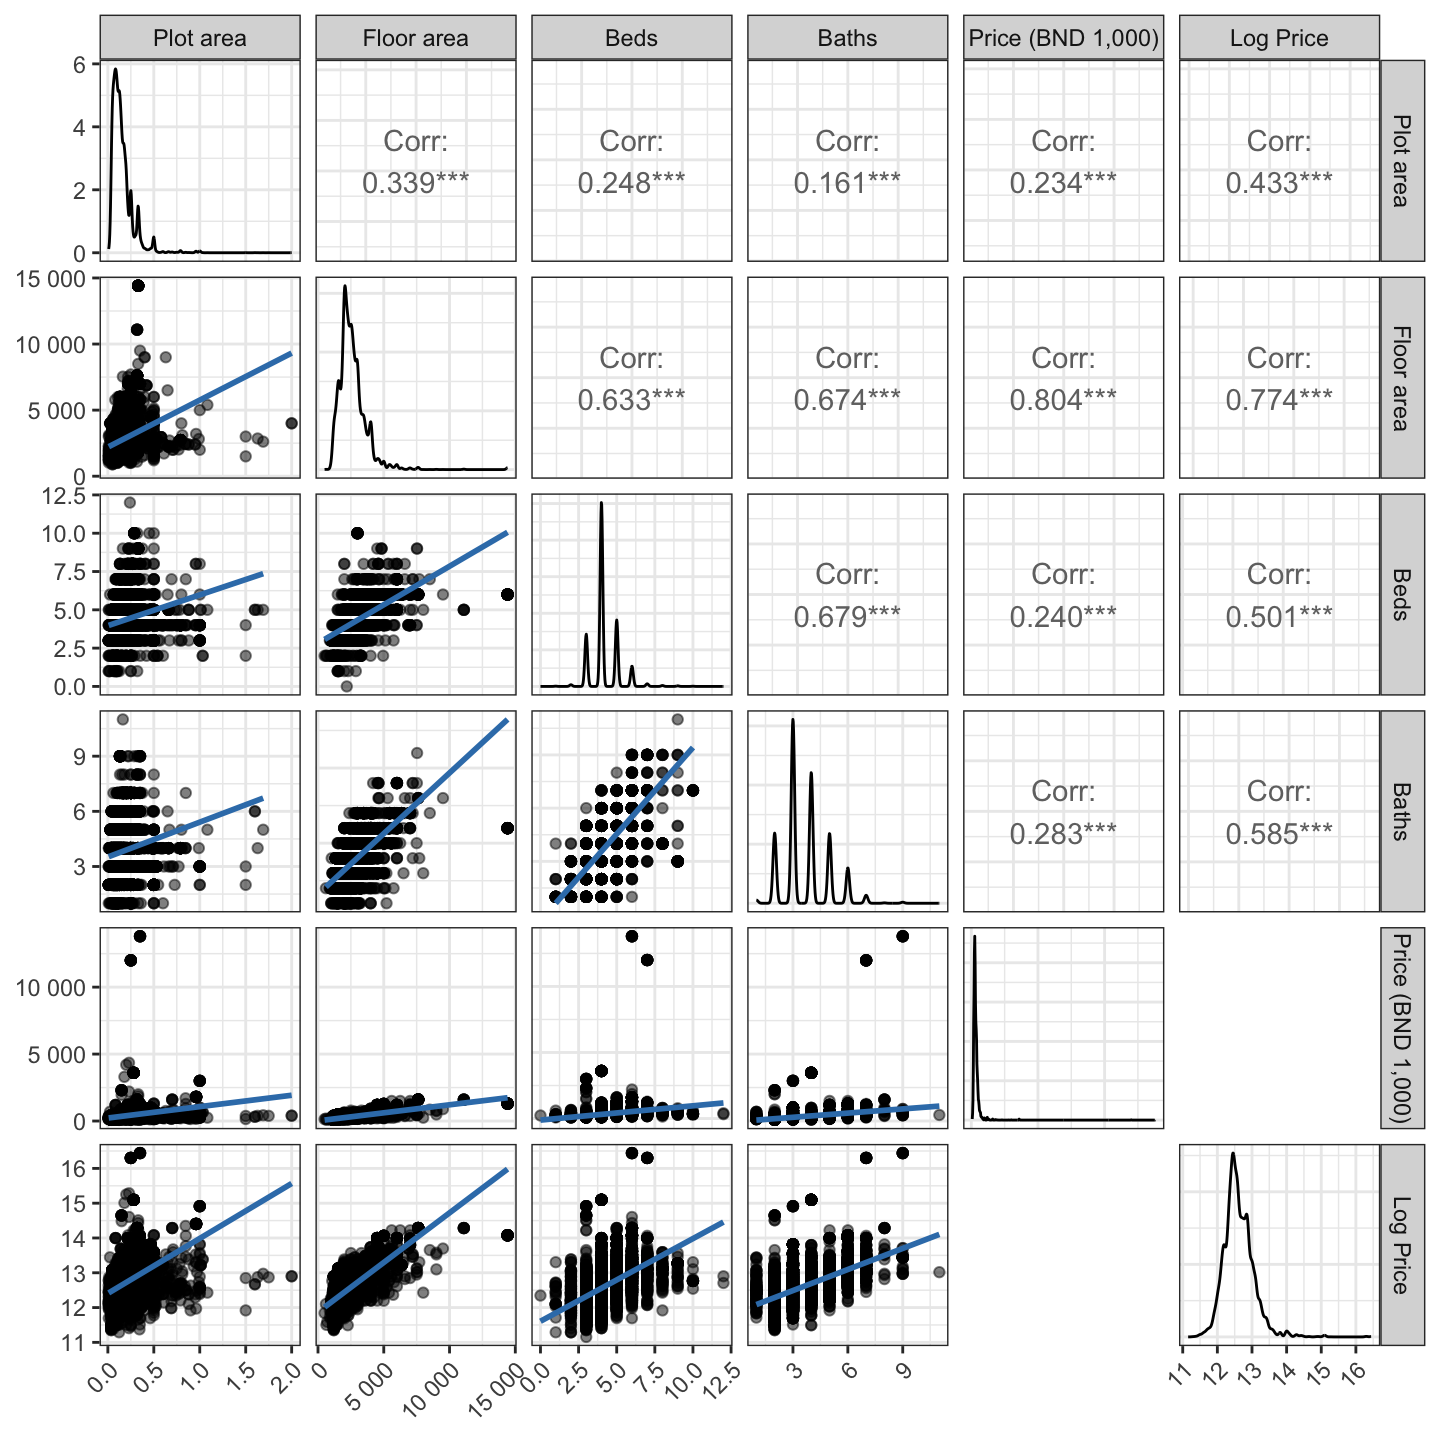

In [ ]:

my_fn <- function(data, mapping, method = "lm", ...) {
  ggplot(data = data, mapping = mapping) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = method, formula = y ~ x, se = FALSE,
                col = RColorBrewer::brewer.pal(3, "Set1")[2], ...)
}

pm <-
  hsp |>
  mutate(
    logprice = log(price),
    price = price / 1000
  ) |>
  select(
    `Plot area` = plot_area,
    `Floor area` = floor_area,
    Beds = beds,
    Baths = baths,
    `Price (BND 1,000)` = price,
    `Log Price` = logprice
  ) |>
  ggpairs(
    progress = FALSE,
    lower = list(continuous = my_fn)
  ) +
  theme_bw() +
  scale_x_continuous(labels = scales::number) +
  scale_y_continuous(labels = scales::number) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )


## Data availability by year

In [ ]:
hsp |>
  mutate(
    year = year(date),
    missing_price = is.na(price),
    missing_type = is.na(type),
    missing_tenure = is.na(tenure),
    missing_status = is.na(status),
    missing_plot_area = is.na(plot_area),
    missing_floor_area = is.na(floor_area),
    missing_storeys = is.na(storeys),
    missing_beds = is.na(beds),
    missing_baths = is.na(baths),
    missing_housechar = missing_plot_area & missing_floor_area & missing_beds & missing_baths,
    year = year(quarter),
  ) |>
  summarise(
    count = n(),
    spatial = length(unique(mukim)) / length(unique(hsp$mukim)),
    # price = sum(missing_price),
    type = sum(missing_type),
    house_char = sum(missing_housechar),
    source = list(unique(method)),
    .by = year
  ) |>
  mutate(
    `nat-archive` = map_chr(source, ~ ifelse("nat-archive" %in% .x, "✔", "")),
    `online-archive` = map_chr(source, ~ ifelse("online-archive" %in% .x, "✔", "")),
    `web-scrape` = map_chr(source, ~ ifelse("web-scrape" %in% .x | "web-scrape-llm" %in% .x, "✔", "")),
    llm = map_chr(source, ~ ifelse("web-scrape-llm" %in% .x, "✔", ""))
  ) |> 
  select(-source) |>
  mutate(across(type:house_char, \(x) x / count)) |>
  gt(rowname_col = "year") |>
  cols_align(
    align = "center",
    columns = `nat-archive`:llm
  ) |>
  tab_spanner(
    label = "Data source",
    columns = `nat-archive`:`web-scrape`
  ) |>
  tab_spanner(
    label = "Missing data severity",
    columns = type:house_char
  ) |>
  fmt_percent(
    spatial:house_char,
    decimals = 1
  ) |>
  cols_label(
    year ~ "Year",
    count ~ "Count",
    spatial ~ "Spatial coverage (mukim)",
    type ~ "Property Type",
    house_char ~ "Property Characteristics",
    `nat-archive` ~ "National Archive",
    `online-archive` ~ "Online Archive",
    `web-scrape` ~ "Web Scraping",
    llm ~ "LLM post-processing"
  ) |>
  grand_summary_rows(
    columns = count:house_char,
    fns = list(Mean = "mean"),
    fmt = list(
      ~ fmt_number(., decimals = 0, columns = "count"),
      ~ fmt_percent(., decimals = 1, columns = c("spatial", "type", "house_char"))
    )
  ) |>
  tab_footnote(
    footnote = paste0("Of Brunei’s 39 mukims, only 27 are considered transactable--excluding water villages and remote, non-developable areas."),
    locations = cells_column_labels(columns = spatial)
  ) |>
  tab_footnote(
    footnote = "Unknown property type.",
    locations = cells_column_labels(columns = type)
  ) |>
  tab_footnote(
    footnote = "Missing all of plot area, floor area, beds, and baths variables.",
    locations = cells_column_labels(columns = house_char)
  ) |>
  tab_options(
    quarto.disable_processing = TRUE,
    grand_summary_row.text_transform = "capitalize"
  ) 


Count 
 Spatial coverage (mukim) 1 
 
 Missing data severity 
 
 
 Data source 
 
 LLM post-processing 
 
 
 Property Type 2 
 Property Characteristics 3 
 National Archive 
 Online Archive 
 Web Scraping 
 
 
 
 1993 
 400 
 33.3% 
 0.0% 
 19.0% 
 ✔ 
 
 
 
 1994 
 653 
 51.9% 
 65.8% 
 27.9% 
 ✔ 
 
 
 
 1995 
 668 
 70.4% 
 66.8% 
 21.3% 
 ✔ 
 
 
 
 1996 
 561 
 51.9% 
 69.7% 
 12.1% 
 ✔ 
 
 
 
 1997 
 385 
 51.9% 
 38.4% 
 26.8% 
 ✔ 
 
 
 
 1998 
 345 
 48.1% 
 36.8% 
 28.7% 
 ✔ 
 
 
 
 1999 
 317 
 51.9% 
 31.9% 
 26.2% 
 ✔ 
 
 
 
 2000 
 378 
 63.0% 
 0.8% 
 4.2% 
 ✔ 
 
 
 
 2001 
 342 
 63.0% 
 0.3% 
 2.3% 
 ✔ 
 
 
 
 2002 
 437 
 63.0% 
 0.0% 
 20.4% 
 ✔ 
 
 
 
 2003 
 449 
 66.7% 
 0.0% 
 13.4% 
 ✔ 
 
 
 
 2004 
 440 
 63.0% 
 0.0% 
 19.1% 
 ✔ 
 
 
 
 2005 
 493 
 66.7% 
 0.0% 
 13.2% 
 ✔ 
 
 
 
 2006 
 653 
 59.3% 
 0.2% 
 11.3% 
 ✔ 
 
 
 
 2007 
 638 
 55.6% 
 0.0% 
 12.9% 
 ✔ 
 
 
 
 2008 
 687 
 59.3% 
 0.3% 
 5.8% 
 ✔ 
 
 
 
 2009 
 531 
 51.9% 
 0.2% 
 4.0% 
 ✔ 
 
 
 
 2010 
 571 
 55.6% 
 0.0% 
 2.1% 
 ✔ 
 
 
 
 2011 
 594 
 55.6% 
 0.2% 
 10.1% 
 ✔ 
 
 
 
 2012 
 934 
 63.0% 
 8.0% 
 4.3% 
 ✔ 
 
 ✔ 
 
 2013 
 882 
 59.3% 
 2.9% 
 26.4% 
 ✔ 
 ✔ 
 ✔ 
 
 2014 
 709 
 66.7% 
 10.6% 
 8.0% 
 
 ✔ 
 ✔ 
 
 2015 
 868 
 66.7% 
 12.6% 
 6.3% 
 
 ✔ 
 ✔ 
 
 2016 
 1461 
 70.4% 
 13.6% 
 4.6% 
 
 ✔ 
 ✔ 
 
 2017 
 1638 
 70.4% 
 14.5% 
 4.5% 
 
 ✔ 
 ✔ 
 
 2018 
 2646 
 66.7% 
 17.6% 
 0.0% 
 
 
 ✔ 
 
 2019 
 3586 
 63.0% 
 15.9% 
 0.0% 
 
 
 ✔ 
 
 2020 
 1363 
 66.7% 
 10.4% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2021 
 1115 
 77.8% 
 2.0% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2022 
 1235 
 77.8% 
 3.6% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2023 
 1593 
 77.8% 
 2.8% 
 0.0% 
 
 
 ✔ 
 ✔ 
 2024 
 2972 
 77.8% 
 4.6% 
 0.1% 
 
 
 ✔ 
 ✔ 
 2025 
 572 
 59.3% 
 14.7% 
 0.0% 
 
 
 ✔ 
 ✔ 
 mean 
 943 
 62.0% 
 13.5% 
 10.1% 
 — 
 — 
 — 
 — 
 
 
 
 
 1 Of Brunei’s 39 mukims, only 27 are considered transactable--excluding water villages and remote, non-developable areas. 
 
 
 2 Unknown property type. 
 
 
 3 Missing all of plot area, floor area, beds, and baths variables.

## Spatial distribution

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

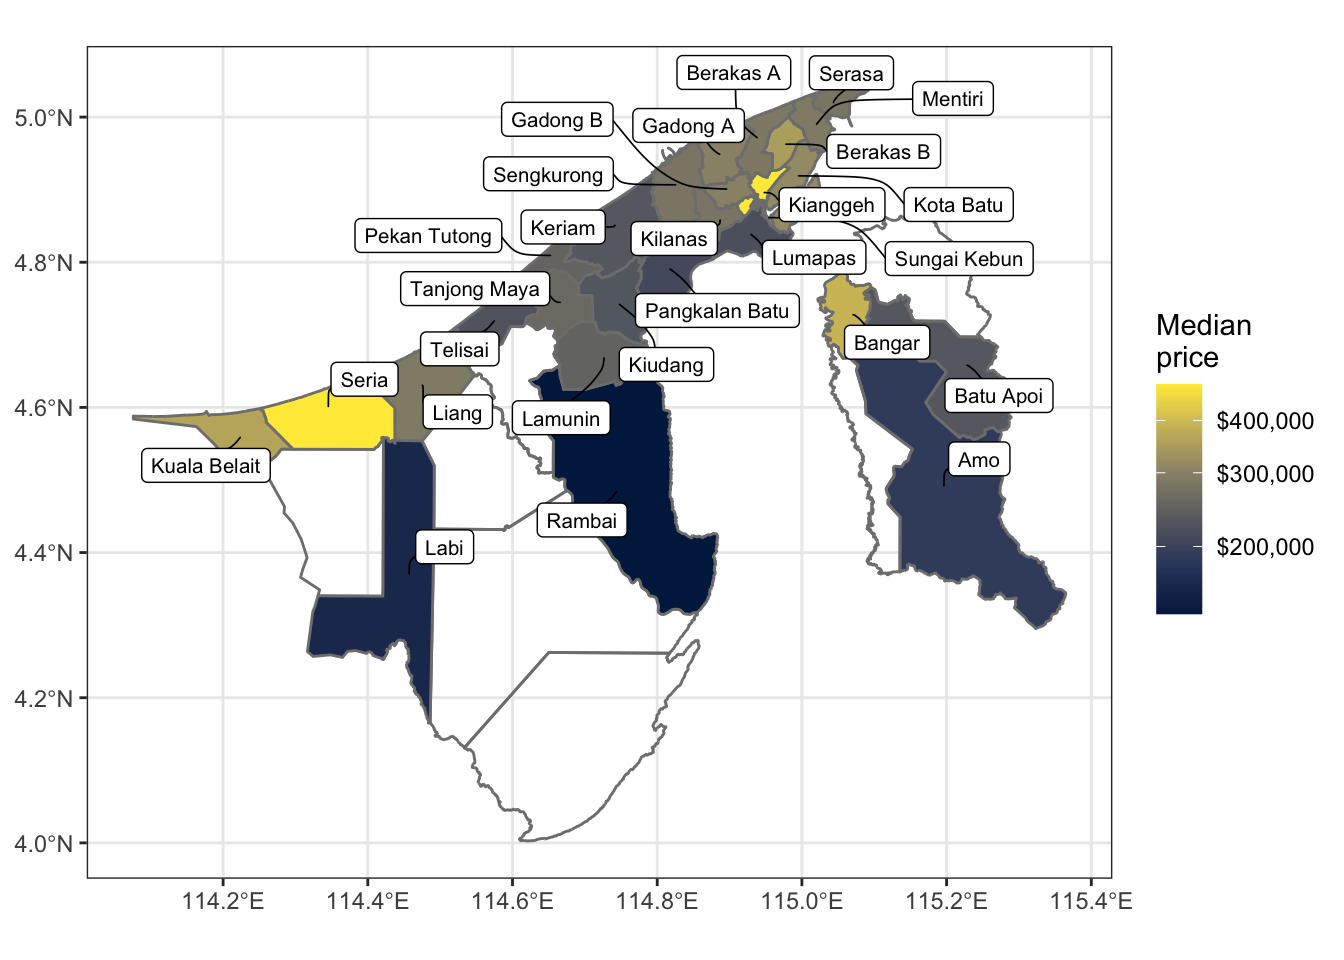

In [ ]:
ggplot(hsp_mkm) +
  geom_sf(aes(fill = price), col = "gray50", linewidth = 0.5) +
  scale_fill_viridis_c(
    option = "cividis",
    na.value = "transparent",
    labels = scales::dollar,
    trans = scales::pseudo_log_trans(sigma = 0.001),
    name = "Median\nprice"
  ) +
  ggrepel::geom_label_repel(
    data = drop_na(hsp_mkm, price) |> 
      mutate(mukim = gsub("Mukim ", "", mukim)),
    aes(label = mukim, geometry = geometry),
    size = 2.7,
    stat = "sf_coordinates",
    max.overlaps = Inf,
    min.segment.length = 0,       
    segment.size = 0.3,           
    segment.curvature = 0.1,      
    force = 5                     
  ) +
  labs(x = NULL, y = NULL) +
  theme_bw()


## Price evolution

(`geom_line()`).

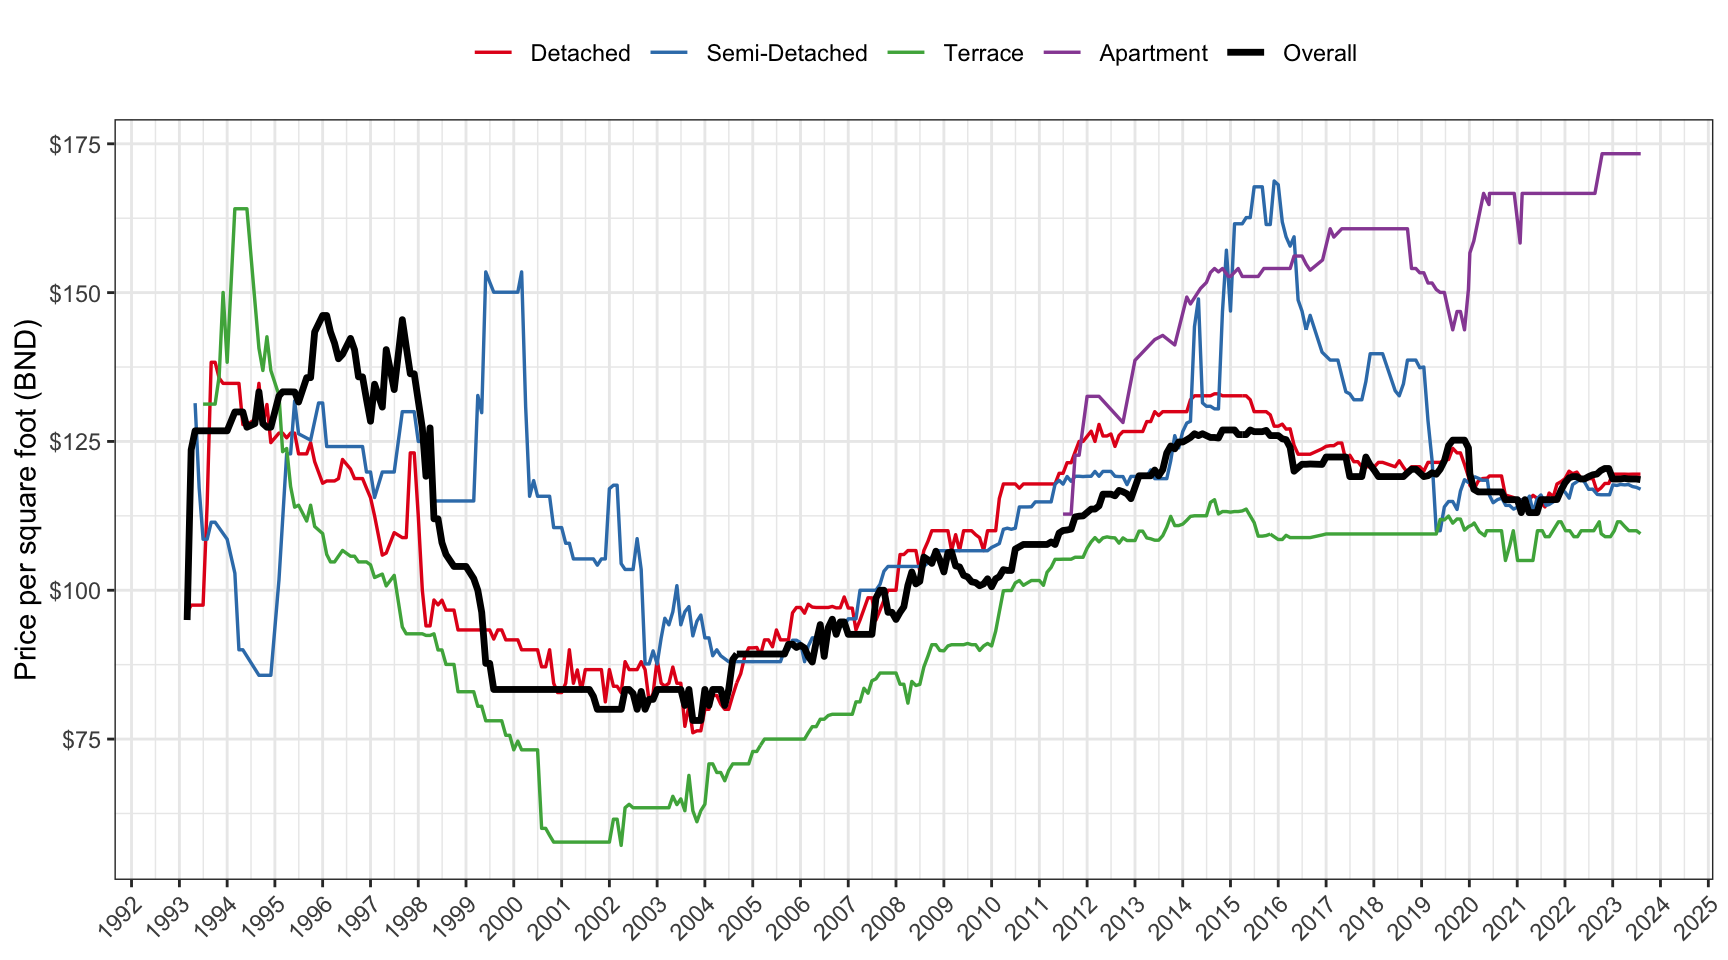

In [ ]:
slider::slide_period_dfr(hsp_all, hsp_all$date, "month", \(df) {
  df |>
    filter(type != "Land") |>
    summarise(
      date = min(date), 
      price = median(price, na.rm = TRUE),
      plot_area = median(plot_area, na.rm = TRUE),
      floor_area = median(floor_area, na.rm = TRUE),
      .by = type
    )
}, .before = 18, .after = 6) |>
  distinct(date, type, .keep_all = TRUE) |> 
  mutate(
    price_per_sqft = price / floor_area,
    type = factor(type, levels = c("Detached", "Semi-Detached", "Terrace",
                                   "Apartment", "Overall")) 
  ) |>
  ggplot(aes(x = date, y = price_per_sqft, col = type)) +
  geom_line(aes(linewidth = type)) +
  scale_x_date(
    breaks = scales::breaks_width("1 year"), 
    labels = scales::label_date("%Y"),
    name = NULL
  ) +
  scale_y_continuous(
    labels = scales::dollar,
    name = "Price per square foot (BND)"
  ) +
  scale_colour_manual(values = c(RColorBrewer::brewer.pal(4, "Set1"), "black")) +
  scale_linewidth_manual(values = c(rep(0.6, 4), 1.2)) +
  labs(
    col = NULL,
    linewidth = NULL
    # caption = "Median smoothed prices using a 12-month rolling window."
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
  ) 


## RPPI Comparison

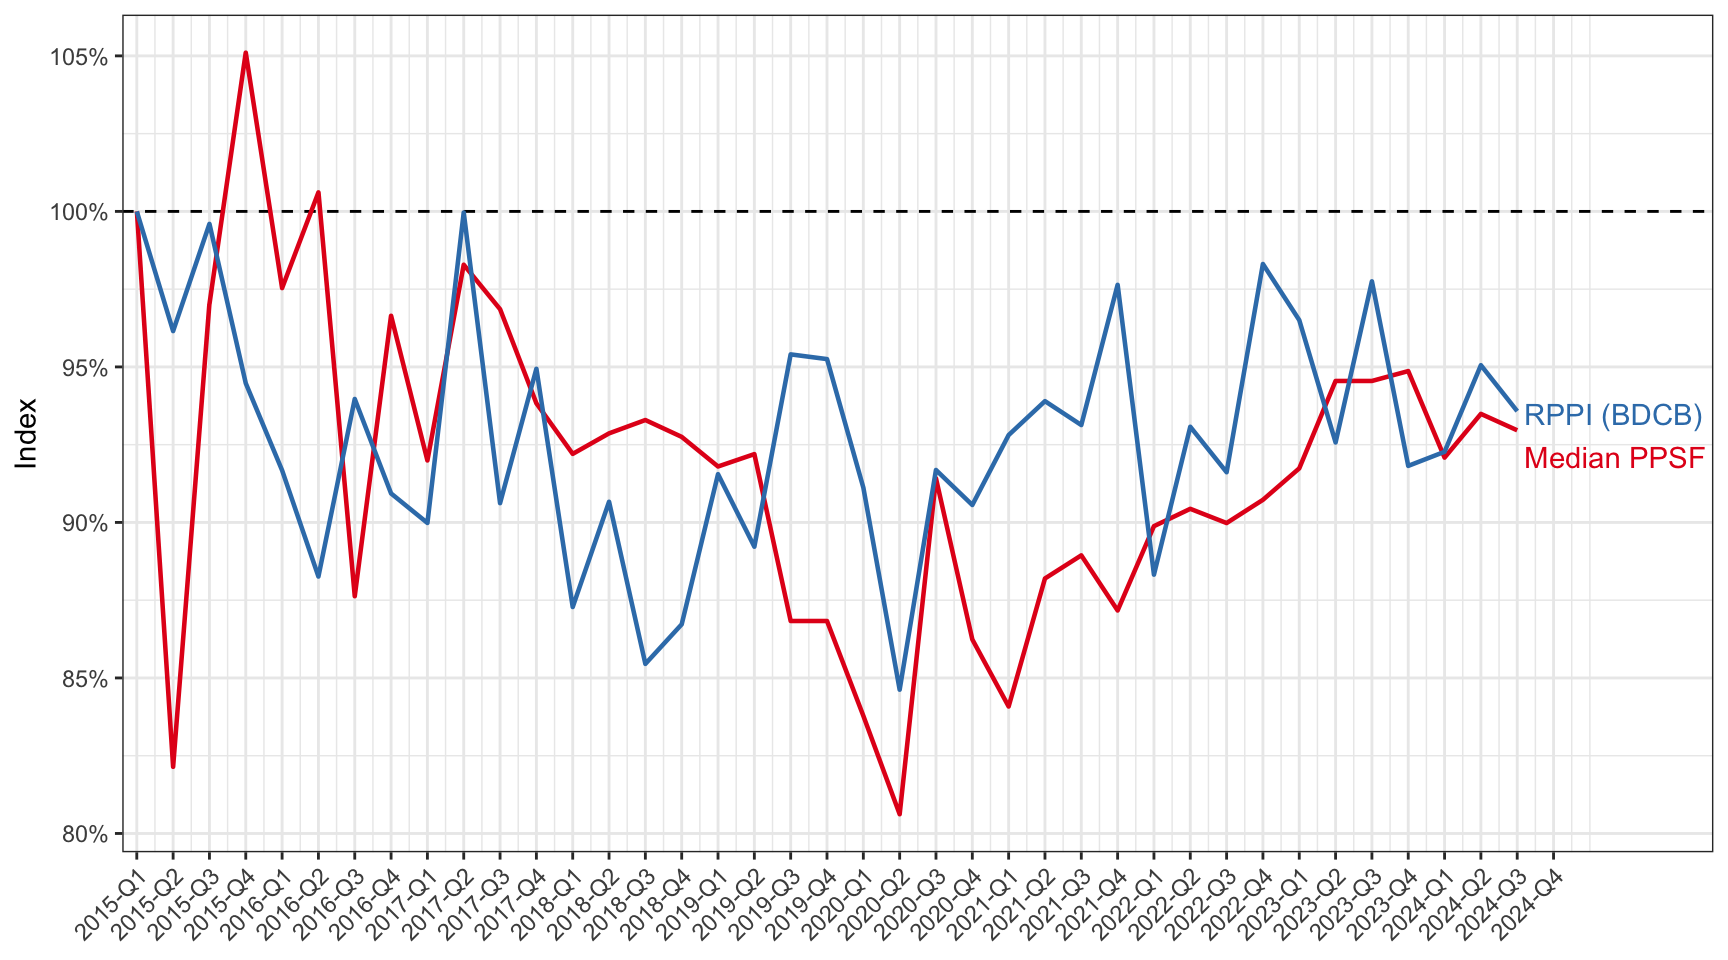

In [ ]:

hsp_rppi |>  
  pivot_longer(c(index, rppi), names_to = "series", values_to = "value") |>
  ggplot(aes(x = quarter, y = value, col = series)) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  geom_line(linewidth = 0.8) +
  scale_colour_brewer(palette = "Set1") +
  scale_y_continuous(labels = scales::percent, name = "Index") +
  zoo::scale_x_yearqtr(
    format = "%Y-Q%q", 
    expand = c(0, 0.1),
    name = NULL, 
    breaks = seq(2015, 2024.75, by = 0.25)
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  ) +
  geom_text(
    data = tibble(
      quarter = c(2024.3 + 0.25, 2024.3 + 0.25),
      series = c("index", "rppi"),
      value = c(0.941, 0.955) - 0.02,
      label = c("Median PPSF", "RPPI (BDCB)")
    ),
    aes(label = label),
    hjust = 0
  ) +
  coord_cartesian(xlim = c(2015, 2025.75))


## LLM Test

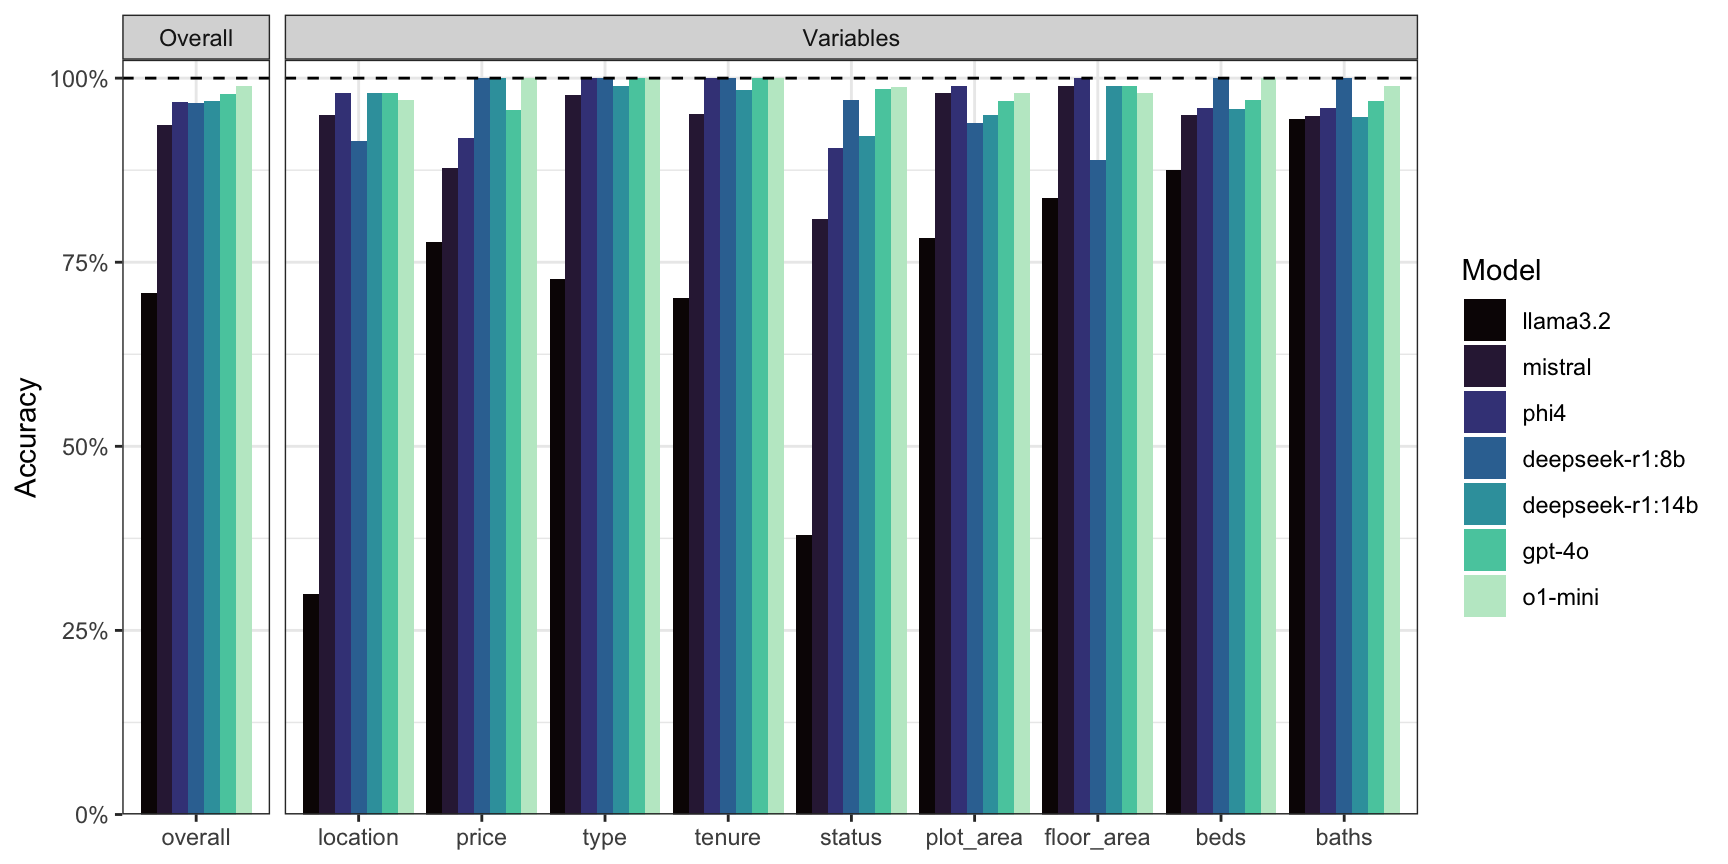

In [ ]:
load(here::here("experiments/llm_test.RData"))
p_llm_test
